Homework 4: Sentiment Analysis - Task 3
----

Names
----
Names: Kaan Tural, Arinjay Singh

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.

Logistic regression is used for binary classification, but can be extended for multi-class classification

Read more about logistic regression here - https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/


In [1]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import time
import sentiment_utils as sutils

[nltk_data] Downloading package punkt to /Users/arinjay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

trainX, trainY = train_tups
devX, devY = dev_tups

# some variables you may want to use
# BINARIZED = True
# USE_COUNT_VECTORIZER = False

In [3]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.


def create_vectors(train_data, dev_data, binarized = False, use_count_vectorizer = False):
    if use_count_vectorizer:
        vectorizer = CountVectorizer(binary=binarized)
        vectorized_train_data = vectorizer.fit_transform([' '.join(x) for x in train_data])
        vectorized_dev_data = vectorizer.transform([' '.join(x) for x in dev_data])
    else:
        vocab = list(set([token for sublist in trainX for token in sublist]))
        vectorized_train_data = sutils.featurize(vocab=vocab, data_to_be_featurized_X=train_data, binary=binarized)
        vectorized_dev_data = sutils.featurize(vocab=vocab, data_to_be_featurized_X=dev_data, binary=binarized)
        
    return vectorized_train_data, vectorized_dev_data



In [4]:
# how much time does it take to featurize the all data with your implementation?

start = time.time()

# featurize the data
featurized_train_data, featurized_dev_data = create_vectors(train_data=trainX, dev_data=devX, binarized=False, use_count_vectorizer=False)

end = time.time()
print("Vocab size:", len(featurized_train_data[0]))
print("That took:", end - start, "seconds")



Vocab size: 30705
That took: 3.5142972469329834 seconds


In [5]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?
start = time.time()

# featurize the data
count_vectorizer_train_data, count_vectorizer_dev_data = create_vectors(train_data=trainX, dev_data=devX, binarized=False, use_count_vectorizer=True)


end = time.time()
print("Vocab size:", count_vectorizer_train_data.shape[1])
print("That took:", end - start, "seconds")

Vocab size: 22596
That took: 0.18368101119995117 seconds


1. How big is your vocabulary using your vectorization function(s)? __The vocab size using the vectorization functions is 30705.__
2. How big is your vocabulary using the `CountVectorizer`? __The vocab size using the CountVectorizer is 22596.__

In [6]:
import numpy as np
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

# featurize function
data_array = np.array(featurized_train_data)
sparsity = (data_array == 0).mean() * 100

# CountVectorizer
average_sparsity = (count_vectorizer_train_data == 0).mean(axis=1).mean() * 100

# Print out the average % of entries that are zeros in each vector in the vectorized training data
print("Sparsity of the vectors from featurize function: {:.2f}%".format(sparsity))
print("Sparsity of the vectors from CountVectorizer: {:.2f}%".format(average_sparsity))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


Sparsity of the vectors from featurize function: 99.51%
Sparsity of the vectors from CountVectorizer: 99.39%


In [7]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels


### Multinomial

In [8]:
from sklearn.metrics import f1_score

featurized_multi_model = LogisticRegression(max_iter=250)
featurized_multi_model.fit(featurized_train_data, trainY)
featurized_multi_preds = featurized_multi_model.predict(featurized_dev_data)

f1 = f1_score(devY, featurized_multi_preds)
print("My Vectorized Features, Multinomial F1 score:", f1)


My Vectorized Features, Multinomial F1 score: 0.780952380952381


In [9]:
count_vectorizer_multi_model = LogisticRegression(max_iter=250)
count_vectorizer_multi_model.fit(count_vectorizer_train_data, trainY)
count_vectorizer_multi_preds = count_vectorizer_multi_model.predict(count_vectorizer_dev_data)

f1 = f1_score(devY, count_vectorizer_multi_preds)
print("CountVectorizer, Multinomial F1 score:", f1)

CountVectorizer, Multinomial F1 score: 0.7962962962962963


### Binary

In [10]:
bi_featurized_train_data, bi_featurized_dev_data = create_vectors(train_data=trainX, dev_data=devX, binarized=True, use_count_vectorizer=False)
bi_count_vectorizer_train_data, bi_count_vectorizer_dev_data = create_vectors(train_data=trainX, dev_data=devX, binarized=True, use_count_vectorizer=True)

In [11]:
featurized_binary_model = LogisticRegression(max_iter=250)
featurized_binary_model.fit(bi_featurized_train_data, trainY)
featurized_binary_preds = featurized_binary_model.predict(bi_featurized_dev_data)

f1 = f1_score(devY, featurized_binary_preds)
print("My Vectorized Features, Binarized F1 score:", f1)

My Vectorized Features, Binarized F1 score: 0.81651376146789


In [12]:
count_vectorizer_binary_model = LogisticRegression(max_iter=250)
count_vectorizer_binary_model.fit(bi_count_vectorizer_train_data, trainY)
count_vectorizer_binary_preds = count_vectorizer_binary_model.predict(bi_count_vectorizer_dev_data)

f1 = f1_score(devY, count_vectorizer_binary_preds)
print("CountVectorizer, Binarized F1 score:", f1)

CountVectorizer, Binarized F1 score: 0.8202764976958524


Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: __0.780952380952381__
- CountVectorizer features, multinomial: __0.7962962962962963__
- your vectorized features, binarized: __0.81651376146789__
- CountVectorizer features, binarized: __0.8202764976958524__

Produce your graph(s) for the combination with the best final f1 score.




F1 Score @ 10%: 0.6739130434782609


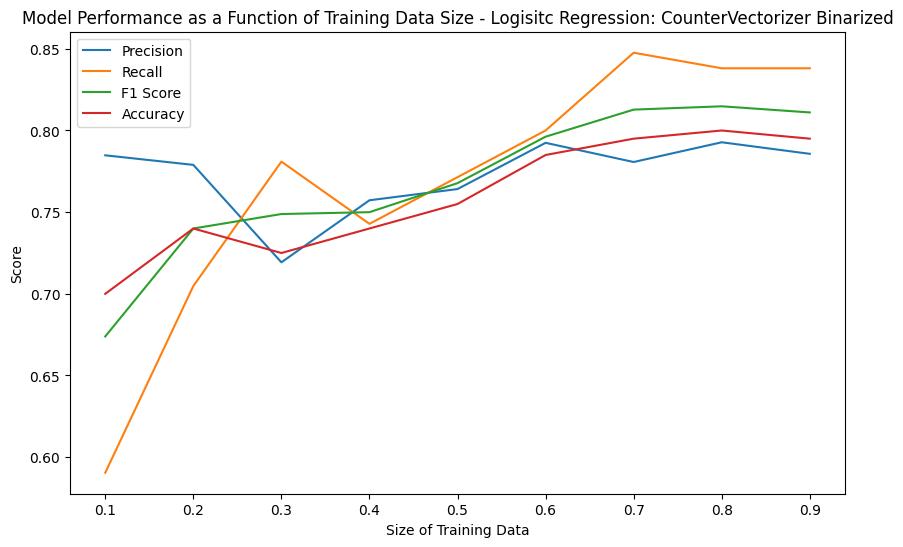

F1 Score @ 10%: 0.6739130434782609


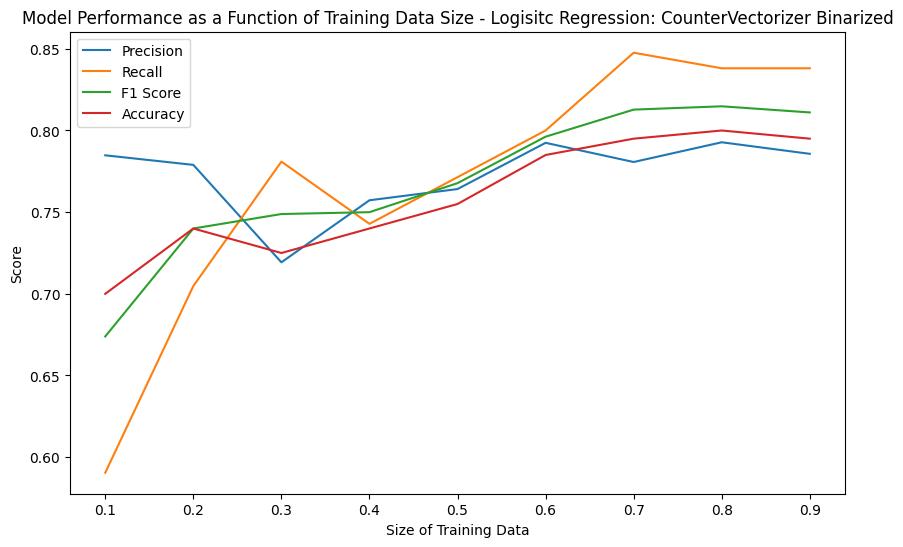

F1 Score @ 10%: 0.6739130434782609


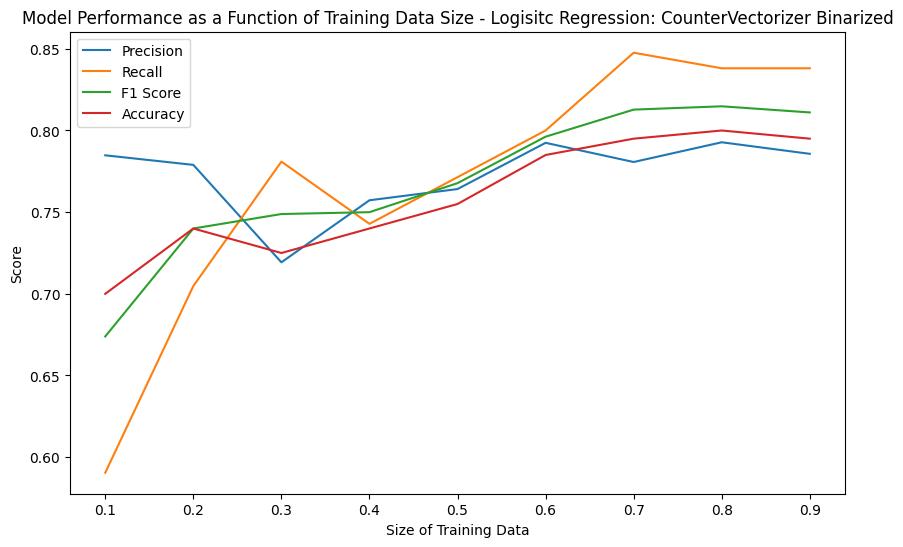

In [15]:
from sklearn.model_selection import train_test_split

for i in range(1, 4):
    train_sizes = np.linspace(0.1, 0.9, 9)
    metrics = list()

    for train_size in train_sizes:  
        X_train, _, y_train, _ = train_test_split(bi_count_vectorizer_train_data, trainY, train_size=train_size, random_state=42)
        model = LogisticRegression(max_iter=250)
        model.fit(X_train, y_train)
        preds = model.predict(bi_count_vectorizer_dev_data)
        current_metrics = sutils.get_prfa(devY, preds)
        metrics.append(current_metrics)
        if train_size == 0.1:
            print("F1 Score @ 10%:", current_metrics[2])
    
    sutils.create_training_graph(train_sizes, metrics, "Logisitc Regression: CounterVectorizer Binarized", f"LR_graph_{i}.png")
